In [22]:
#ellol
import pandas as pd
import numpy as np
data = pd.read_csv('heart_attack_prediction_dataset.csv')
df = data # Using df (dataframe) as a naming convention for the dataset

In [23]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [24]:
num = df["Heart Attack Risk"].value_counts()

df[['BP_Systolic', 'BP_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
#  Convert the columns to numeric
df['BP_Systolic'] = pd.to_numeric(df['BP_Systolic'])
df['BP_Diastolic'] = pd.to_numeric(df['BP_Diastolic'])
#Dropping Blood Pressure
df = df.drop("Blood Pressure", axis = 1)
print(num)
print(df.head())
print(df.isna().sum().sort_values())

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64
  Patient ID  Age     Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0    BMW7812   67    Male          208          72         0               0   
1    CZE1114   21    Male          389          98         1               1   
2    BNI9906   21  Female          324          72         1               0   
3    JLN3497   84    Male          383          73         1               1   
4    GFO8847   66    Male          318          93         1               1   

   Smoking  Obesity  Alcohol Consumption  ...        BMI Triglycerides  \
0        1        0                    0  ...  31.251233           286   
1        1        1                    1  ...  27.194973           235   
2        0        0                    0  ...  28.176571           587   
3        1        0                    1  ...  36.464704           378   
4        1        1                    0  ...  21.809144           231   

   Physica

In [25]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
numeric_columns = df.select_dtypes(include=np.number).drop(columns=[ 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Heart Attack Risk']).columns
# Assuming 'df' is your DataFrame and 'numeric_columns' contains the names of your numeric columns
scaler = StandardScaler()

# Apply Z-score normalization to your numeric columns
df_standardized = df.copy()
df_standardized[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df_standardized.head())
# Now 'df_standardized' contains the standardized data for your numeric columns


  Patient ID       Age     Sex  Cholesterol  Heart Rate  Diabetes  \
0    BMW7812  0.625557    Male    -0.641579   -0.147042         0   
1    CZE1114 -1.539322    Male     1.596895    1.118179         1   
2    BNI9906 -1.539322  Female     0.793023   -0.147042         1   
3    JLN3497  1.425621    Male     1.522691   -0.098380         1   
4    GFO8847  0.578495    Male     0.718820    0.874867         1   

   Family History  Smoking  Obesity  Alcohol Consumption  ...       BMI  \
0               0        1        0                    0  ...  0.373454   
1               1        1        1                    1  ... -0.268479   
2               0        0        0                    0  ... -0.113134   
3               1        1        0                    1  ...  1.198524   
4               1        1        1                    0  ... -1.120826   

  Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
0     -0.588539                        -1.528843            -

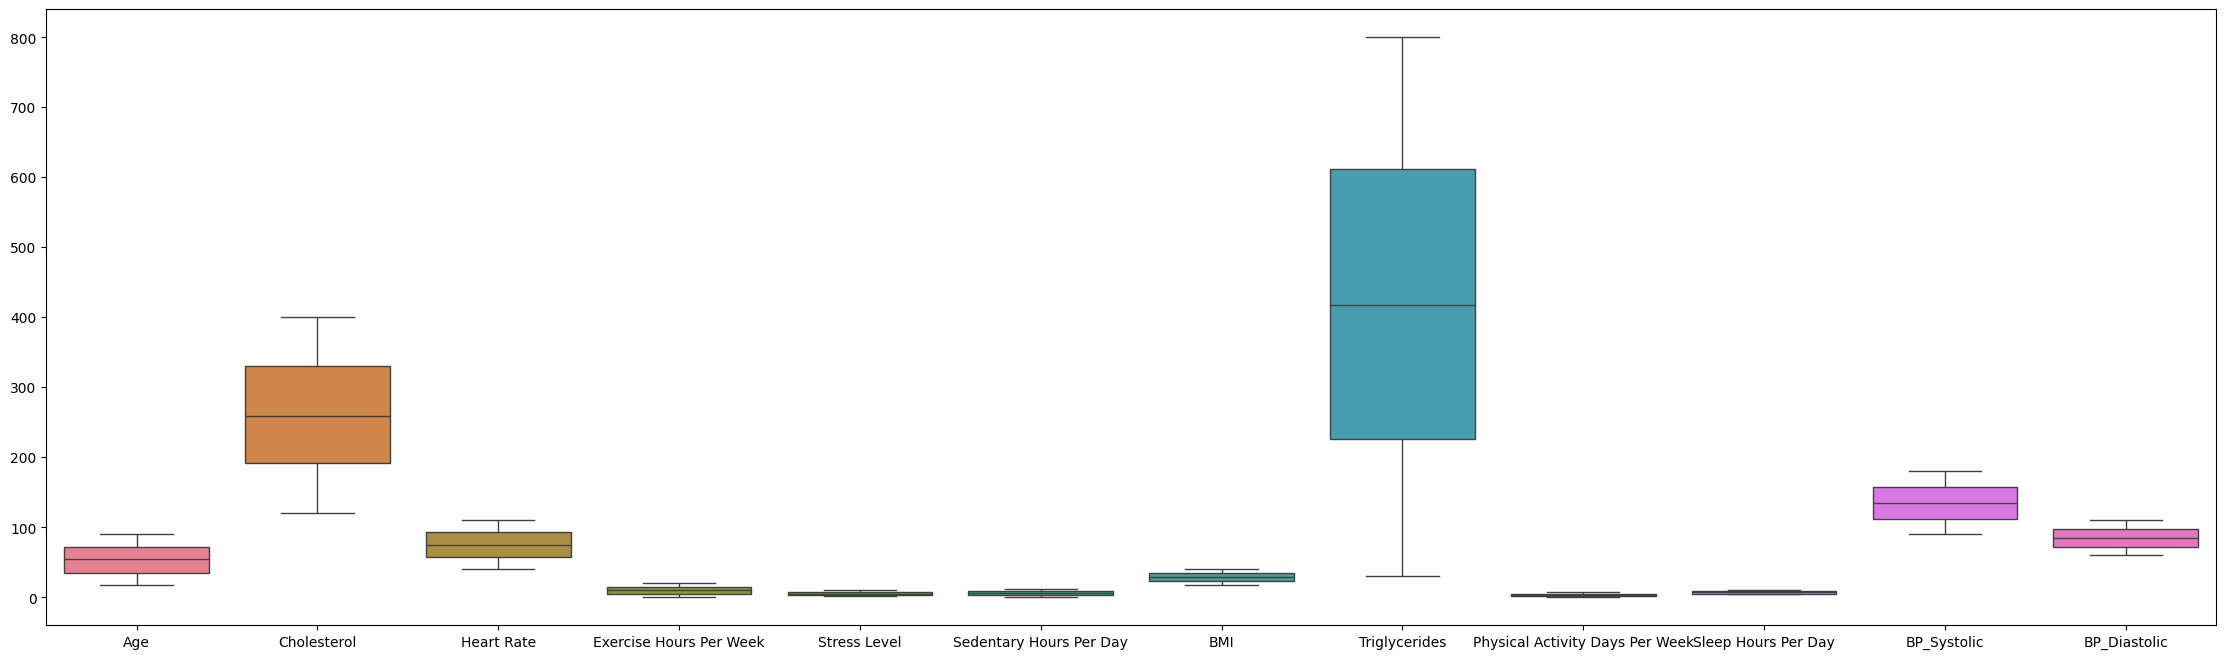

In [26]:
# @title handling outliers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numerical columns excluding categorical columns
numeric_columns = df.select_dtypes(include=np.number).drop(columns=['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use', 'Heart Attack Risk','Income']).columns

# Set up the matplotlib figure
plt.figure(figsize=(28, 8))

# Create box plots for each numerical column
sns.boxplot(data=df[numeric_columns])

# Show the plot
plt.show()


In [27]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'df' is your DataFrame

# Select categorical columns that you want to apply label encoding to
# Note: Adjust the list according to your dataset and use label encoding
# for ordinal categories or when it's specifically beneficial for your models
categorical_columns_for_label_encoding = ['Patient ID','Sex', 'Diabetes', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Diet', 'Country', 'Continent', 'Hemisphere']

# Initialize a LabelEncoder and apply it to each categorical column
label_encoder = LabelEncoder()
for column in categorical_columns_for_label_encoding:
    df[column] = label_encoder.fit_transform(df[column])

# Now, 'df' contains the encoded values for your categorical columns
duplicates_exist = df.duplicated().any()
print(duplicates_exist)
print(df.columns)
print(df.head())

False
Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk', 'BP_Systolic', 'BP_Diastolic'],
      dtype='object')
   Patient ID  Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  \
0         521   67    1          208          72         0               0   
1         998   21    1          389          98         1               1   
2         529   21    0          324          72         1               0   
3        3160   84    1          383          73         1               1   
4        2083   66    1          318          93         1               1   

   Smoking  Obes

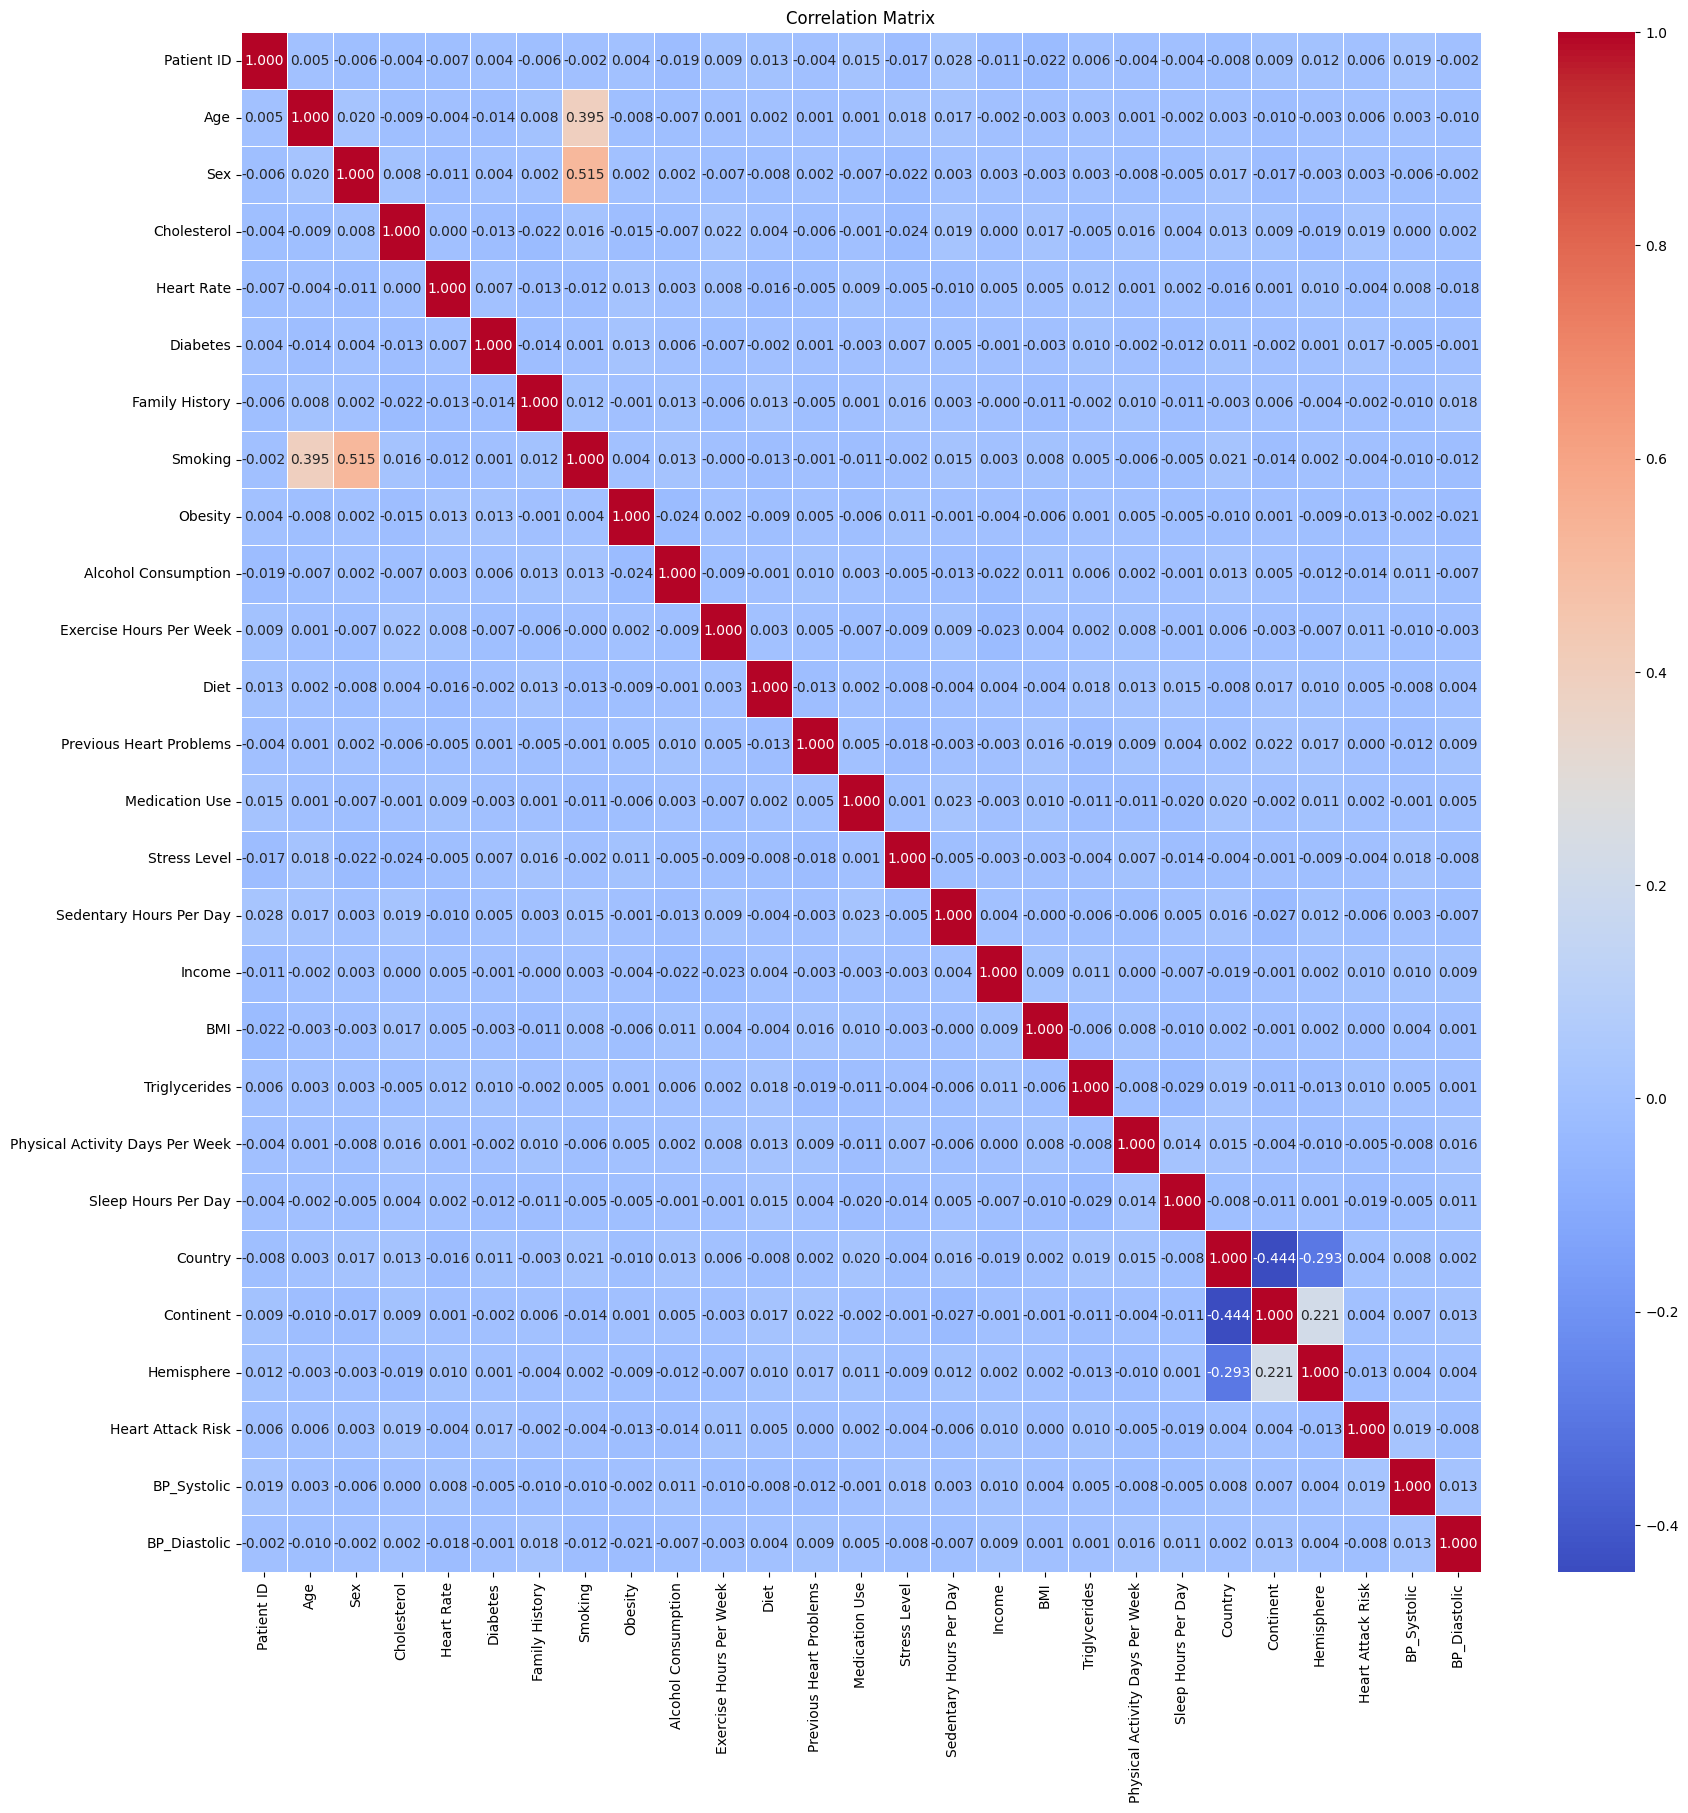

In [28]:
#We have 25 features to work with (excluding the Heart Attack Risk column)

corr = df.corr()

#Correlation Heatmap

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()